In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches


from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.impute import SimpleImputer


from scipy import stats


from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix


from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
amar_df = pd.read_csv("environmental_hazards_dataset.csv")

amar_df.head()


,Date,Time,PM2.5 (µg/m³),PM10 (µg/m³),SO2 (ppm),NO2 (ppm),O3 (ppm),CO (ppm),VOCs (ppm),Temperature (°C),...,Wind Direction (Plant),Elevation,Proximity to Water Bodies,Historical Pollution Levels,Historical Temperature,Historical Humidity,Historical Wind Speed,Regulatory Data,Industrial Activity,Demographic Data
0,9/20/2024,12:46 PM,72.270101,32.568989,0.043392,0.028461,0.055327,0.179492,0.032548,22.166122,...,233.987396,145.853101,12.820206,56.164568,14.135469,50.141578,3.863696,2.194684,46.939795,185.703235
1,7/18/2024,2:16 PM,6.747984,9.135173,0.011195,0.044592,0.079686,4.749705,0.060121,15.034988,...,354.246242,140.754262,92.746775,30.329635,30.398358,54.108518,4.839530,6.000220,89.332581,575.923842
2,8/20/2024,8:23 AM,68.086136,36.266488,0.099623,0.004048,0.062645,9.671082,0.004625,12.235807,...,352.970636,274.777236,27.332588,89.385499,19.188208,30.352519,2.302978,0.114647,85.588037,63.636990
3,4/28/2024,10:44 AM,70.109788,4.536920,0.029038,0.052235,0.057379,4.952743,0.059823,11.762767,...,181.294971,431.887854,67.987377,15.830185,22.677743,39.068708,0.338013,4.162035,82.653984,984.506065
4,4/6/2024,3:43 AM,55.872374,28.280174,0.007791,0.009316,0.078406,9.019366,0.080178,29.263493,...,170.978667,490.824872,66.329124,4.596059,32.173583,65.801097,1.771949,3.594852,20.471000,732.171033


In [3]:
amar_df.drop(columns=['Date'], inplace=True)
amar_df.drop(columns=['Time'], inplace=True)
amar_df.tail()

,PM2.5 (µg/m³),PM10 (µg/m³),SO2 (ppm),NO2 (ppm),O3 (ppm),CO (ppm),VOCs (ppm),Temperature (°C),Humidity (%),Wind Speed (m/s),...,Wind Direction (Plant),Elevation,Proximity to Water Bodies,Historical Pollution Levels,Historical Temperature,Historical Humidity,Historical Wind Speed,Regulatory Data,Industrial Activity,Demographic Data
994,48.552016,77.978704,0.064652,0.045414,0.041018,8.579602,0.025574,16.597935,37.297796,3.430729,...,163.557552,6.604428,6.344384,66.019705,28.756618,73.477127,4.018458,3.473400,38.962976,509.457725
995,47.234705,90.380992,0.028162,0.070079,0.040961,9.188755,0.096281,21.125098,78.664249,1.292807,...,251.653025,35.187404,55.973861,40.252755,25.163984,59.579530,4.936779,2.351563,65.463311,408.097607
996,3.115103,50.617329,0.011022,0.005463,0.072985,8.516893,0.053727,12.014217,32.282884,1.869780,...,155.726655,267.454463,36.900112,93.024093,26.958454,33.778966,4.098263,0.913471,13.322140,359.503917
997,81.363915,54.903110,0.012345,0.024283,0.031074,8.272658,0.009832,19.445846,47.521414,3.990424,...,3.111287,193.152086,21.202330,5.419532,29.113155,75.650433,4.115945,0.601090,86.092056,450.039279
998,44.660632,79.179847,0.096909,0.045402,0.098340,6.071292,0.059910,21.556868,78.507268,3.903292,...,52.419668,218.466680,63.240434,45.680617,10.765113,66.500830,4.248396,2.223192,9.452490,127.939699


In [4]:
print(amar_df.head())

# Separate features (X) and target variable (y)
X = amar_df.drop('Historical Pollution Levels', axis=1)  # Assuming 'environmental_alarm' is the target variable
y = amar_df['Historical Pollution Levels']


   PM2.5 (µg/m³)  PM10 (µg/m³)  SO2 (ppm)  NO2 (ppm)  O3 (ppm)  CO (ppm)  \
0      72.270101     32.568989   0.043392   0.028461  0.055327  0.179492   
1       6.747984      9.135173   0.011195   0.044592  0.079686  4.749705   
2      68.086136     36.266488   0.099623   0.004048  0.062645  9.671082   
3      70.109788      4.536920   0.029038   0.052235  0.057379  4.952743   
4      55.872374     28.280174   0.007791   0.009316  0.078406  9.019366   

   VOCs (ppm)  Temperature (°C)  Humidity (%)  Wind Speed (m/s)  ...  \
0    0.032548         22.166122     58.331806          3.948585  ...   
1    0.060121         15.034988     39.636747          0.126325  ...   
2    0.004625         12.235807     47.994405          3.116433  ...   
3    0.059823         11.762767     44.671071          0.879330  ...   
4    0.080178         29.263493     66.528496          0.804029  ...   

   Wind Direction (Plant)   Elevation  Proximity to Water Bodies  \
0              233.987396  145.853101     

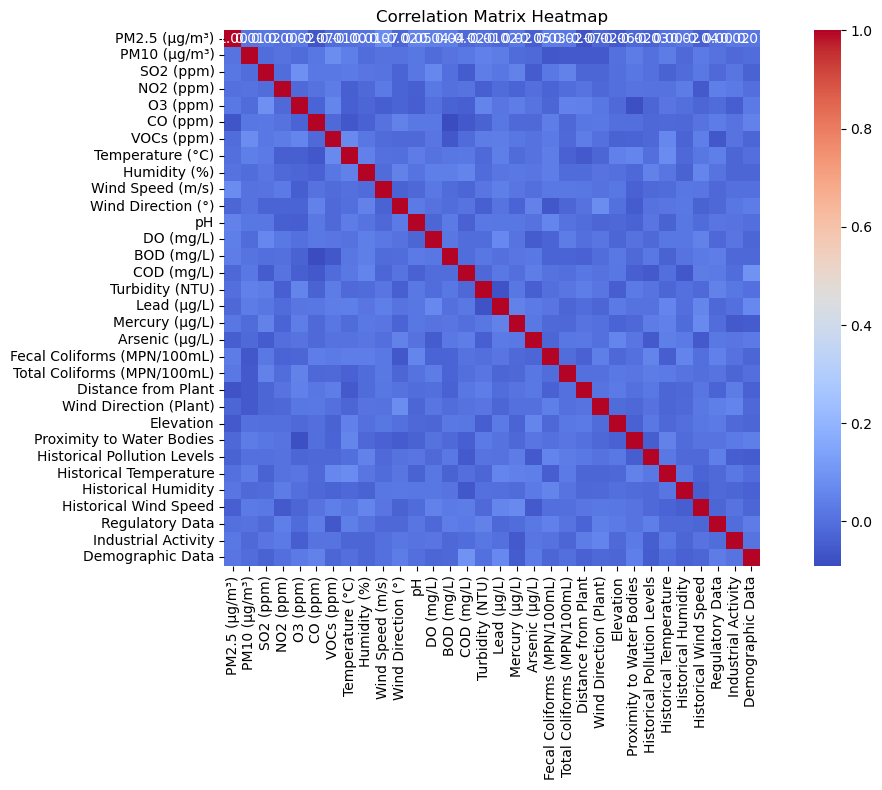

In [16]:



# Compute correlation matrix
corr_matrix = amar_df.corr(numeric_only=True)  # Only numeric columns

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


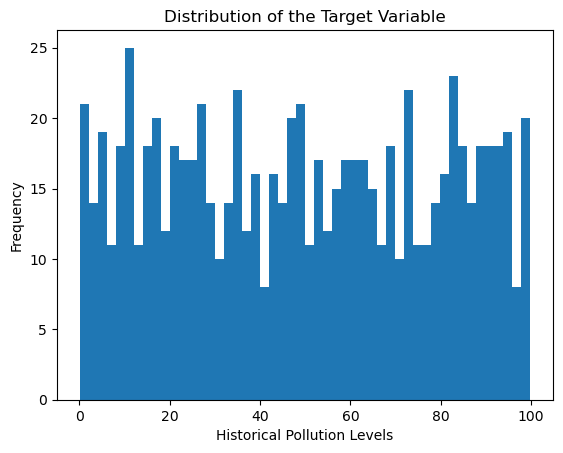

In [6]:
import matplotlib.pyplot as plt
# Plot the distribution of the target variable
plt.hist(y_train, bins=50)
plt.xlabel('Historical Pollution Levels')
plt.ylabel('Frequency')
plt.title('Distribution of the Target Variable')
plt.show()

In [7]:
# Initialize the Random Forest regressor
regressor = RandomForestRegressor()

# Model Training
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

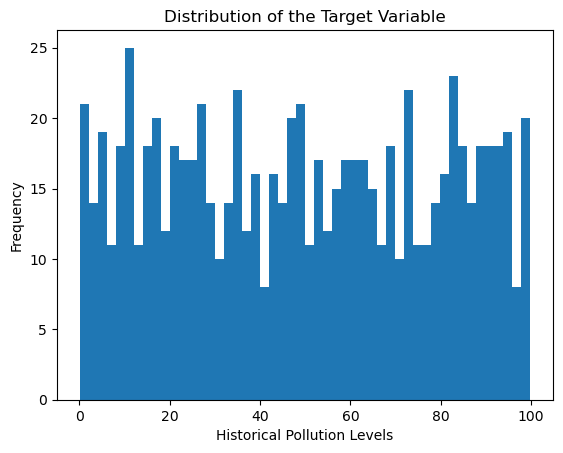

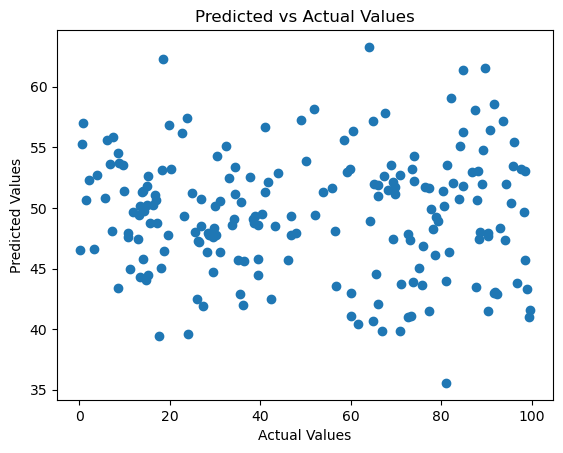

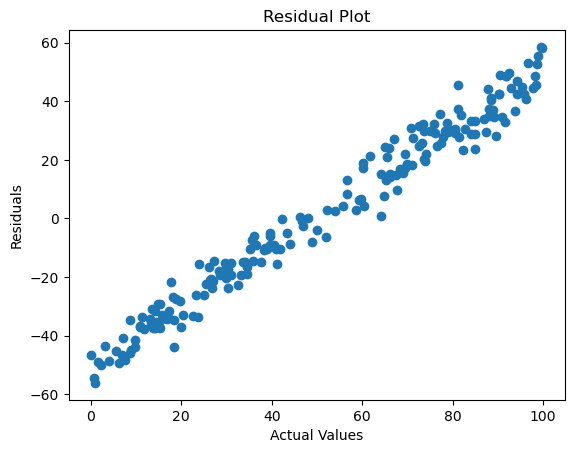

In [8]:
import matplotlib.pyplot as plt
# Plot the distribution of the target variable
plt.hist(y_train, bins=50)
plt.xlabel('Historical Pollution Levels')
plt.ylabel('Frequency')
plt.title('Distribution of the Target Variable')
plt.show()

# Plot the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

# Plot the residuals
plt.scatter(y_test, y_test - y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

PM2.5 (µg/m³): 0.034663000429897145
PM10 (µg/m³): 0.03582019630731154
SO2 (ppm): 0.028891071679599558
NO2 (ppm): 0.029972896947292247
O3 (ppm): 0.027442063959401568
CO (ppm): 0.038799357486539815
VOCs (ppm): 0.028247153975295706
Temperature (°C): 0.028561325136047266
Humidity (%): 0.03905884187126895
Wind Speed (m/s): 0.02906525277084299
Wind Direction (°): 0.027693707894729497
pH: 0.03311275640141017
DO (mg/L): 0.03140119432693229
BOD (mg/L): 0.03581418464165398
COD (mg/L): 0.03642753176740789
Turbidity (NTU): 0.034798415943381344
Lead (µg/L): 0.03342541155302994
Mercury (µg/L): 0.041506229505266196
Arsenic (µg/L): 0.03213340879661568
Fecal Coliforms (MPN/100mL): 0.035391397736595144
Total Coliforms (MPN/100mL): 0.027139627946683564
Distance from Plant: 0.02576529832984334
Wind Direction (Plant): 0.030381000492005417
Elevation: 0.02835734185980637
Proximity to Water Bodies: 0.03234610519488435
Historical Temperature: 0.03259816758048467
Historical Humidity: 0.03363046474250984
Histori

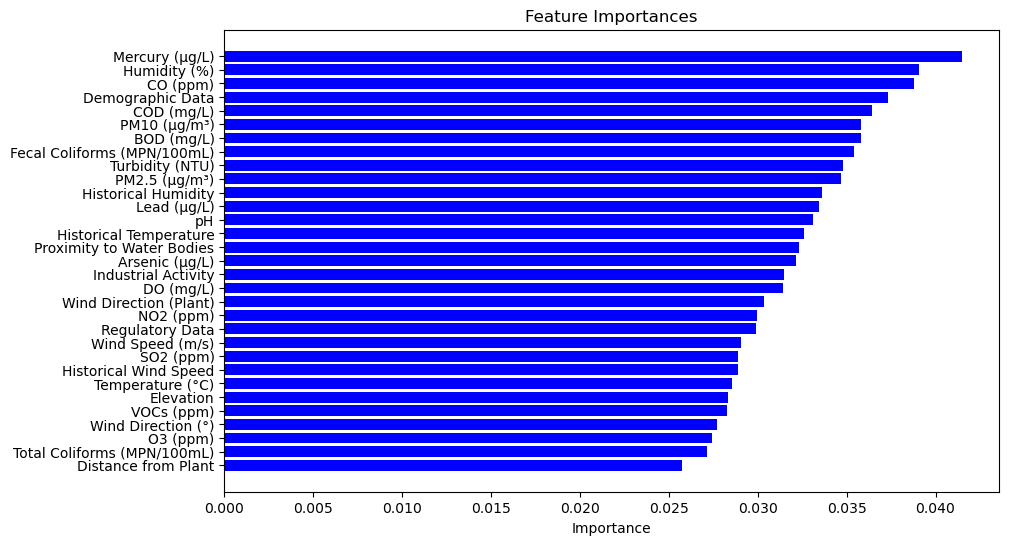

In [9]:
# Feature Importance
importances = regressor.feature_importances_
features = X.columns
for i, feature in enumerate(features):
  print(f'{feature}: {importances[i]}')



# Plot the feature importances
importances = regressor.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(features)), importances[indices], color='b', align='center')
plt.yticks(range(len(features)), features[indices])
plt.xlabel('Importance')
plt.show()


In [10]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Evaluate current model
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Initial Model Performance:")
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Faster Model Tuning with RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

random_search = RandomizedSearchCV(
    estimator=regressor,
    param_distributions=param_dist,
    n_iter=20,  # Reduce or increase for speed vs accuracy
    cv=5,
    verbose=1,
    random_state=42,
    scoring='neg_mean_squared_error',
    n_jobs=-1  # Use all available cores
)

random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate tuned model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("\nTuned Model Performance:")
print("Best Parameters:", random_search.best_params_)
print("Mean Squared Error:", mse_best)
print("R^2 Score:", r2_best)



Initial Model Performance:
Mean Squared Error: 936.4114882175048
R^2 Score: -0.037750960223525754
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Tuned Model Performance:
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}
Mean Squared Error: 913.210640961509
R^2 Score: -0.012039291987011591


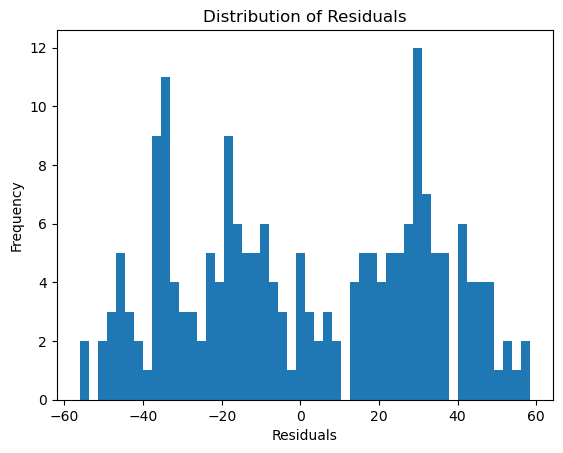

In [11]:
import matplotlib.pyplot as plt
import numpy as np
# Plot the distribution of the residuals
plt.hist(y_test - y_pred, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [13]:
# Re-train with the best parameters
best_regressor = RandomForestRegressor(**random_search.best_params_)
best_regressor.fit(X_train, y_train)

# Make predictions with the best model
y_pred_best = best_regressor.predict(X_test)

# Model Evaluation with the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("Mean Squared Error with Best Model:", mse_best)
print("R^2 Score with Best Model:", r2_best)


Mean Squared Error with Best Model: 908.7024404932797
R^2 Score with Best Model: -0.007043209149870666


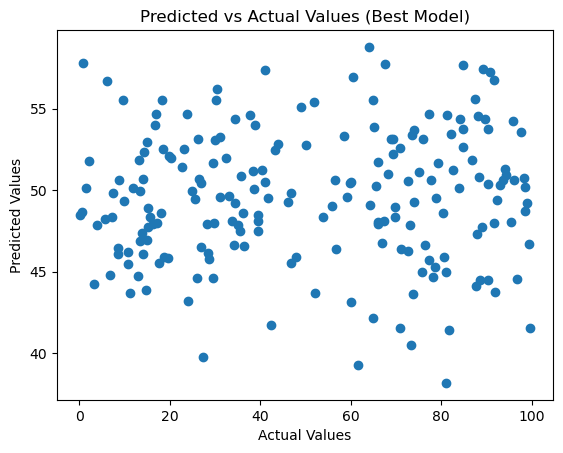

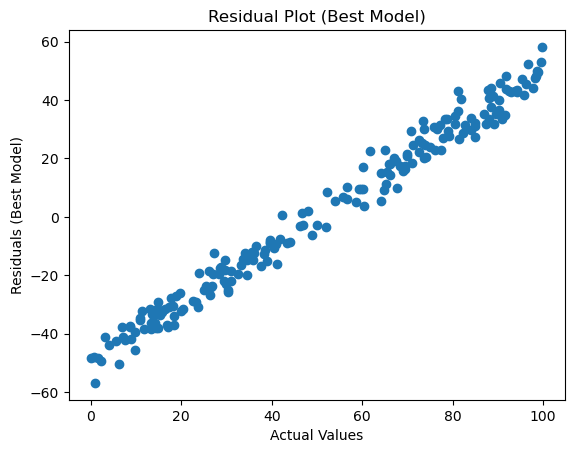

In [14]:
# Plot the predicted vs actual values
plt.scatter(y_test, y_pred_best)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Best Model)')
plt.show()

# Plot the residuals
plt.scatter(y_test, y_test - y_pred_best)
plt.xlabel('Actual Values')
plt.ylabel('Residuals (Best Model)')
plt.title('Residual Plot (Best Model)')
plt.show()

